In [4]:
from solarpy import *
import pandas as pd
from tqdm.auto import tqdm
from functools import lru_cache

In [5]:
panel = solar_panel(1, 0.2)

In [6]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="geoapiExercises")

def get_location_by_coordinates(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return get_location_by_coordinates(address)

# location = get_location_by_coordinates("San Martino al Cimino, Italy")

# print((location.latitude, location.longitude, location.altitude))

GeocoderInsufficientPrivileges: Non-successful status code 403

In [7]:
# san_martino = (location.latitude, location.longitude, 500)
san_martino = (42, 12, 500)

In [8]:
panel.set_position(*san_martino)

In [9]:
import numpy as np

def normal_vector_NED(h_angle, v_angle):
    """import numpy as np

def normal_vector_NED(h_angle, v_angle):
    """"""
    from a plane that I define with:
     -  an horizonal angle (positive clockwise, starts from 0 for north, so east is 90 south is 180 and west is 270) 
     - vertical angle is the angle between the plane an the horizonatal (0 for flat on the ground, 90 for perpendicular).
     to get a normal to the plane in NED (North East Down) frame.
    """
    # Convert angles from degrees to radians
    h_angle = np.deg2rad(h_angle)
    v_angle = np.deg2rad(v_angle)

    # Calculate the components of the normal vector
    x = np.sin(h_angle) * np.cos(v_angle)
    y = np.cos(h_angle) * np.cos(v_angle)
    z = np.sin(v_angle)

    # Create the normal vector
    normal = np.array([x, y, z])

    # Normalize the vector
    normal = normal / np.linalg.norm(normal)

    return normal

A unit vector normal to a plane in the North-East-Down (NED) frame represents a direction perpendicular to a given plane, with its magnitude equal to 1, in a coordinate system where:

- North represents the x-axis,
- East represents the y-axis,
- Down represents the z-axis

In [10]:
from fastcore.test import *

this problem in 2d:
- ho un angolo della retta che forma con l'asse x (x é NORD)

voglio trovare il vettore normale alla retta
- un vettore che sta sulla retta ha x = cos(angolo) e y = sin(angolo)
- un vettore normale alla retta ha x = -sin(angolo) e y = cos(angolo)

$$ \vec{v_0}^{r_0} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} $$

now we do an horizontal rotation of the angle $\theta$:

$$ rot_1 = \begin{bmatrix} cos(\theta) & -sin(\theta) & 0 \\ sin(\theta) & cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix} $$

$$ \vec{v_0}^{r_1} = rot_1 \cdot \vec{v^\prime_0} = \begin{bmatrix} cos(\theta) \\ sin(\theta) \\ 0 \end{bmatrix} $$

and then we do a rotation of $\phi$ around the y axis:

$$ rot_2 = \begin{bmatrix} cos(\phi) & 0 & sin(\phi) \\ 0 & 1 & 0 \\ -sin(\phi) & 0 & cos(\phi) \end{bmatrix} $$

$$ \vec{v_0}^{r_2} = rot_2 \cdot \vec{v^\prime_0} = \begin{bmatrix} cos(\theta)cos(\phi) + sin(\theta)sin(\phi) \\ sin(\theta)cos(\phi) - cos(\theta)sin(\phi) \\ 0 \end{bmatrix} $$

if we combine the two rotations together we get:

$$ rot = rot_2 \cdot rot_1 = \begin{bmatrix} cos(\theta)cos(\phi) & -sin(\theta) & cos(\theta)sin(\phi) \\ sin(\theta)cos(\phi) & cos(\theta) & sin(\theta)sin(\phi) \\ -sin(\phi) & 0 & cos(\phi) \end{bmatrix} $$

but we actually care to rotate the vector $$ \vec{v_z} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} $$ that is already the normal to our plane, so we do:

$$ \vec{v_z}^{r_2} = rot_2 \cdot rot_1 \cdot \vec{v_z} = \begin{bmatrix} cos(\theta)sin(\phi) \\ sin(\theta)sin(\phi) \\ cos(\phi) \end{bmatrix} $$

this should be our normal!

In [11]:
def plane_to_NED(h_angle, v_angle):
    """from a plane that I define with:
     -  an horizonal angle (positive clockwise, starts from 0 for north, so east is 90 south is 180 and west is 270) 
     - vertical angle is the angle between the plane an the horizonatal (0 for flat on the ground, 90 for perpendicular).
     to get a normal to the plane in NED (North East Down) frame.
    """
    h_angle = (360 - h_angle ) % 360
    # Convert angles from degrees to radians
    h_angle = np.deg2rad(h_angle)
    v_angle = np.deg2rad(v_angle)

    # a vector on the plane
    x = -np.cos(h_angle) * np.sin(v_angle)
    y = -np.sin(h_angle) * np.sin(v_angle)
    z = -np.cos(v_angle)
    return np.array([x, y, z])

In [12]:
def plane_to_NED2(h_angle, v_angle):
    """from a plane that I define with:
     -  an horizonal angle (positive clockwise, starts from 0 for north, so east is 90 south is 180 and west is 270) 
     - vertical angle is the angle between the plane an the horizonatal (0 for flat on the ground, 90 for perpendicular).
     to get a normal to the plane in NED (North East Down) frame.
    """
    h_angle = (360 - h_angle ) % 360
    # Convert angles from degrees to radians
    h_angle = np.deg2rad(h_angle)
    v_angle = np.deg2rad(v_angle)

    # a vector on the plane
    h_rot = np.array([[np.cos(h_angle), -np.sin(h_angle), 0],
                      [np.sin(h_angle), np.cos(h_angle), 0],
                      [0, 0, 1]])
    v_rot = np.array([[np.cos(v_angle), 0, np.sin(v_angle)],
                        [0, 1, 0],
                        [-np.sin(v_angle), 0, np.cos(v_angle)]])
    z = np.array([0, 0, -1])
    x = h_rot @ v_rot @ z
    return z, h_rot, v_rot

In [13]:
plane_to_NED(0,0)

array([-0., -0., -1.])

In [14]:
plane_to_NED2(0,0)

(array([ 0,  0, -1]),
 array([[ 1., -0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]),
 array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-0.,  0.,  1.]]))

In [15]:
plane_to_NED(-90,0)

array([-0., -0., -1.])

In [16]:
plane_to_NED(50,0)

array([-0.,  0., -1.])

In [17]:
plane_to_NED(50,0)

array([-0.,  0., -1.])

In [18]:
plane_to_NED(0,10)

array([-0.17364818, -0.        , -0.98480775])

In [19]:
plane_to_NED(0,70)

array([-0.93969262, -0.        , -0.34202014])

In [20]:
np.linalg.norm(plane_to_NED(-90,0)) # this is wrong! if I rotate the plane by 90 degrees I should get the same vector length

1.0

In [21]:
# import math

# def convert_angles_to_normal(horizontal_angle, vertical_angle):
#     horizontal_angle = 360 - horizontal_angle + 90 # 0 is south, 90 is east
#     # Convert angles from degrees to radians
#     phi = math.radians(horizontal_angle)
#     theta = math.radians(vertical_angle)

#     # Convert spherical coordinates to Cartesian coordinates
#     x = math.sin(theta) * math.cos(phi)
#     y = math.sin(theta) * math.sin(phi)
#     z = math.cos(theta)

#     return (x, y, z)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_vector(v):
    fig = plt.figure()

    # Create a 3D axis
    ax = fig.add_subplot(111, projection='3d')

    # Plot the vector
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='red')

    # Create a meshgrid for the surface. Adjust size as needed.
    # x, y = np.meshgrid(range(-10, 10), range(-10, 10))
    # z = np.zeros(x.shape)

    # Plot the surface
    # ax.plot_surface(x, y, z, color='c', alpha=0.5, rstride=100, cstride=100)

    plt.show()

In [26]:
plot_3d_vector(convert_angles_to_normal(10, 0))

NameError: name 'convert_angles_to_normal' is not defined

In [27]:
convert_angles_to_normal(0, 90)

NameError: name 'convert_angles_to_normal' is not defined

In [28]:
def plot_xy(v, scale=3):
    plt.quiver(0, 0, v[0], v[1], scale=scale)
    plt.show()

In [29]:
convert_angles_to_normal(10, 90)

NameError: name 'convert_angles_to_normal' is not defined

In [30]:
plot_xy(convert_angles_to_normal(horizontal_angle=00, vertical_angle=90), scale=2)

NameError: name 'convert_angles_to_normal' is not defined

In [31]:
plot_xy(convert_angles_to_normal(horizontal_angle=100, vertical_angle=90), scale=2)

NameError: name 'convert_angles_to_normal' is not defined

In [32]:
plot_xy(convert_angles_to_normal(20, 90), scale=1)

NameError: name 'convert_angles_to_normal' is not defined

In [33]:
def plot_yz(v, scale=3):
    plt.quiver(0, 0, v[1], v[2], scale=scale)
    plt.set_xlim([0, v[1]])
    plt.set_ylim([0, v[2]])
    plt.show()

In [34]:
def plot_xz(v, scale=3):
    print(v)
    plt.quiver(0, 0, v[0], v[2])
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.show()

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [36]:

def plot_xz(v, scale=3):
    fig, ax = plt.subplots()

    arrow = patches.Arrow(0, 0, v[0], v[2], width=0.1, color='k')
    ax.add_patch(arrow)

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])

    plt.show()

In [37]:

def plot_xy(v, scale=3):
    fig, ax = plt.subplots()

    arrow = patches.Arrow(0, 0, v[0], v[1], width=0.1, color='k')
    ax.add_patch(arrow)

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])

    plt.show()

In [38]:
@interact(horizontal_angle=(0, 360, 10), vertical_angle=(0, 90, 10))
def _plot_xz(horizontal_angle=0, vertical_angle=90):
    return plot_xz(convert_angles_to_normal(horizontal_angle, vertical_angle))

NameError: name 'interact' is not defined

In [39]:
@interact(horizontal_angle=(0, 360, 10), vertical_angle=(0, 90, 10))
def _plot_xy(horizontal_angle=0, vertical_angle=90):
    return plot_xy(convert_angles_to_normal(horizontal_angle, vertical_angle))

NameError: name 'interact' is not defined

In [40]:
panel.set_orientation(plane_to_NED(h_angle=90, v_angle=20))

In [41]:
import polars as pl
from polars import col as c
from plotnine import *

In [42]:
@lru_cache(maxsize=100)
def calc_year_power(panel, horizontal_angle=90, vertical_angle=20):
    panel.set_orientation(plane_to_NED(horizontal_angle, vertical_angle))
    df = pd.DataFrame(index=pd.date_range(start="01/01/2024", end="31/12/2024", inclusive="left", freq="H"))
    for time in tqdm(df.index):
        panel.set_datetime(time)
        df.loc[time, "power"] = panel.power()
    return pl.from_pandas(df.reset_index(names="time")).with_columns(
        month = c.time.dt.month(),
        month_name = c.time.dt.strftime("%B"),
        week = c.time.dt.week(),
        yday = c.time.dt.strftime("%j"),
        hour = c.time.dt.hour()
    )


In [43]:
year_power = calc_year_power(panel)

  0%|          | 0/8760 [00:00<?, ?it/s]

In [44]:
year_power

time,power,month,month_name,week,yday,hour
datetime[ns],f64,i8,str,i8,str,i8
2024-01-01 00:00:00,0.0,1,"""January""",1,"""001""",0
2024-01-01 01:00:00,0.0,1,"""January""",1,"""001""",1
2024-01-01 02:00:00,0.0,1,"""January""",1,"""001""",2
2024-01-01 03:00:00,0.0,1,"""January""",1,"""001""",3
2024-01-01 04:00:00,0.0,1,"""January""",1,"""001""",4
2024-01-01 05:00:00,0.0,1,"""January""",1,"""001""",5
2024-01-01 06:00:00,0.0,1,"""January""",1,"""001""",6
2024-01-01 07:00:00,0.0,1,"""January""",1,"""001""",7
2024-01-01 08:00:00,4.223999,1,"""January""",1,"""001""",8


total power per day for a 1m2 solar panel with 20% efficiency, orientation to east and a 20 degrees angle

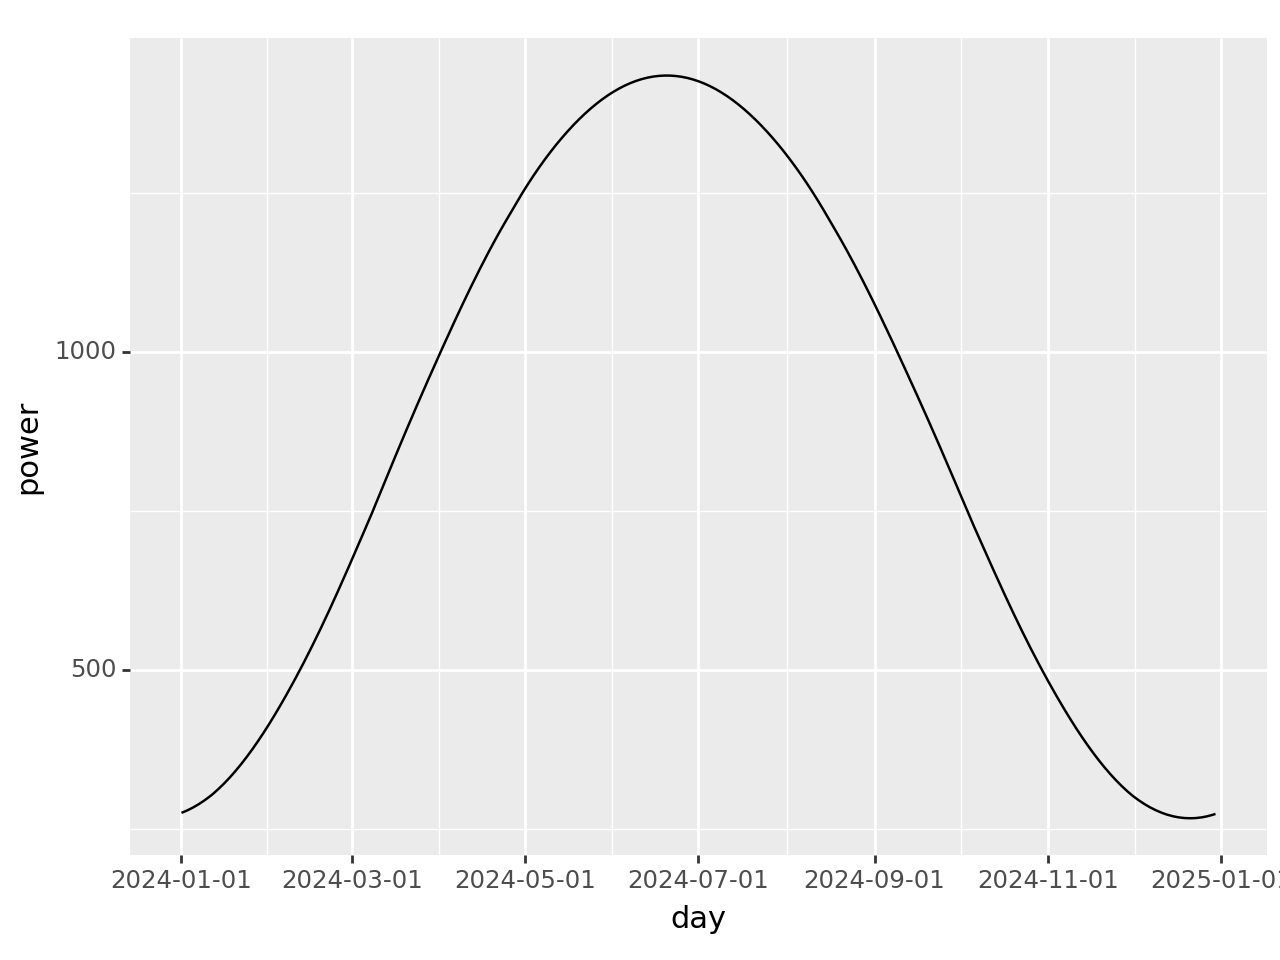

<Figure Size: (640 x 480)>

In [46]:
def plot_yday(year_power): return year_power.group_by(c.yday).agg(power = c.power.sum(), day = c.time.first()) >> ggplot(aes('day', 'power')) + geom_line()
plot_yday(year_power)

In [47]:
from mizani.formatters import date_format
from mizani.breaks import date_breaks

In [48]:
def plot_power_month(year_power):
    return (
        year_power
        .group_by(c.month_name)
        .agg(power = c.power.sum(), month = c.time.first())
        >> ggplot(aes('month', 'power')) + geom_col() + 
        scale_x_datetime(breaks=date_breaks("1 month"), labels=date_format("%B"), expand=(0,0))
   + theme(axis_text_x=element_text(angle=45))
   + labs(y="Power (KWh)")
    )

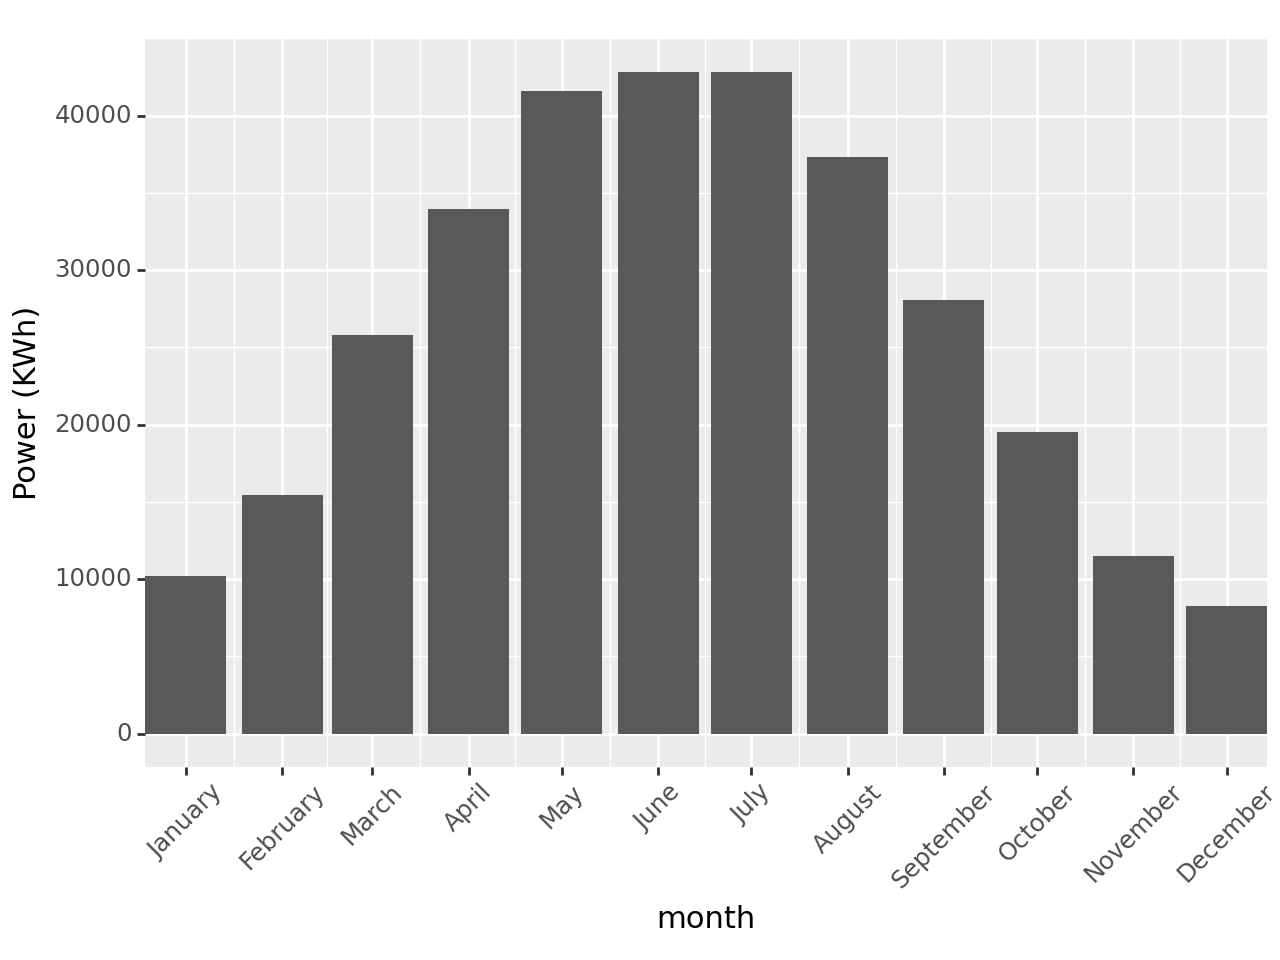

<Figure Size: (640 x 480)>

In [49]:
plot_power_month(year_power)

In [70]:
def plot_avg_hour(year_power):
    agg = year_power.group_by(c.hour).agg(mean = c.power.mean()) 
    return (agg >> ggplot(aes('hour', 'mean')) + 
            geom_line() + geom_vline(xintercept=agg.sort(c.mean, descending=True).select(c.hour.first()))
            + scale_x_continuous(breaks=range(0, 24, 1))
              + labs(y="Power (KWh)"))

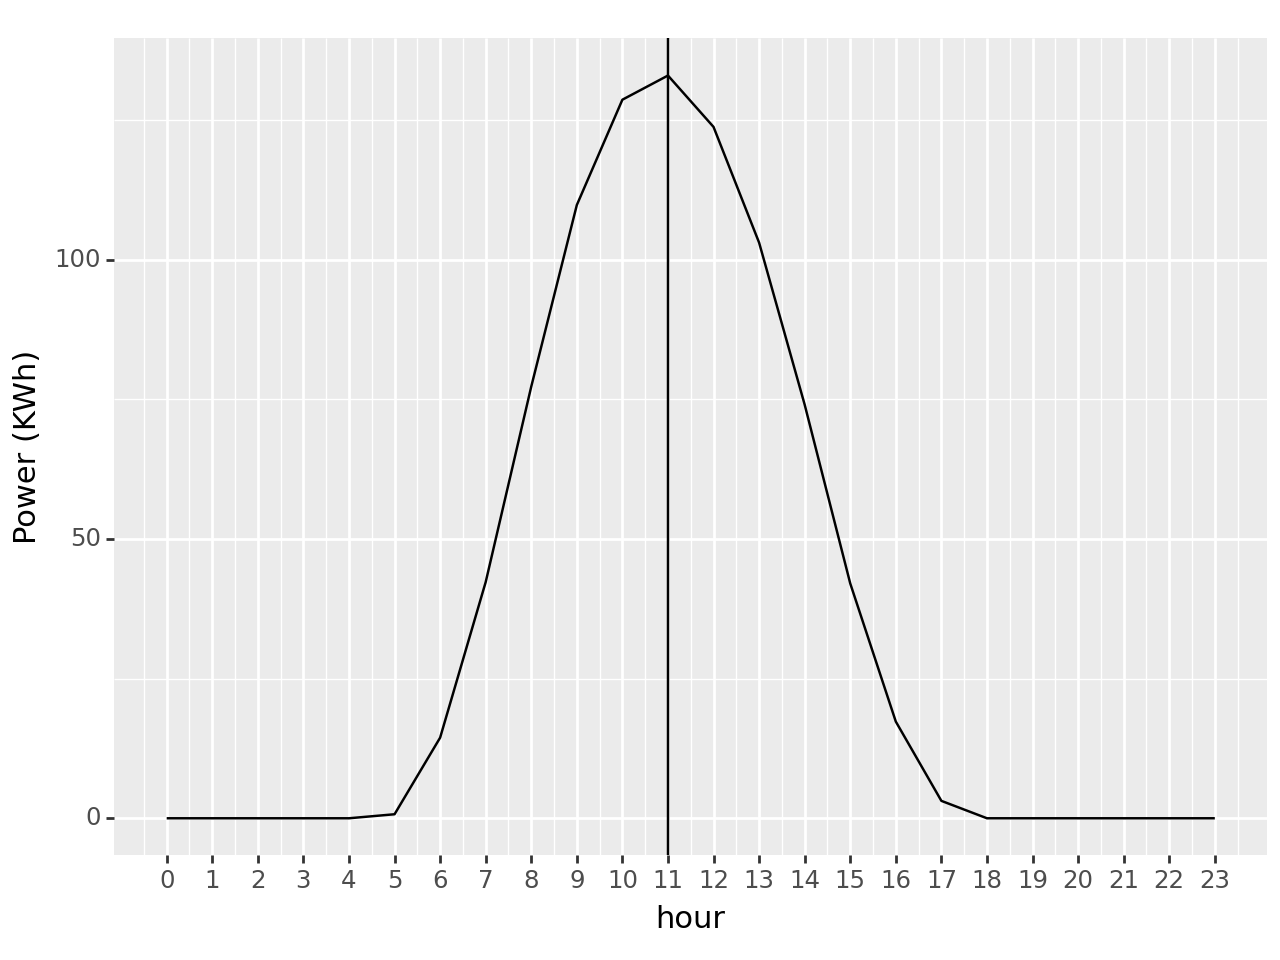

<Figure Size: (640 x 480)>

In [71]:
plot_avg_hour(year_power)

In [72]:
months = {'1': 'January', '2': 'February', '3': 'March', '4': 'April', '5': 'May', '6':'June', '7':'July', '8':'August', '9':'September', '10':'October', '11':'November', '12':'December'}

In [73]:
def plot_hour_month(year_power):
  return (year_power
  .group_by(c.hour, c.month)
  .agg(mean = c.power.mean(), std = c.power.std())
  >> ggplot(aes('hour', 'mean', fill='hour'))
    + geom_col()
      + facet_wrap('month', labeller=lambda x: months[x]) 
      + theme(figure_size=(10,8))
      + lims(fill=(5, 19))
  )

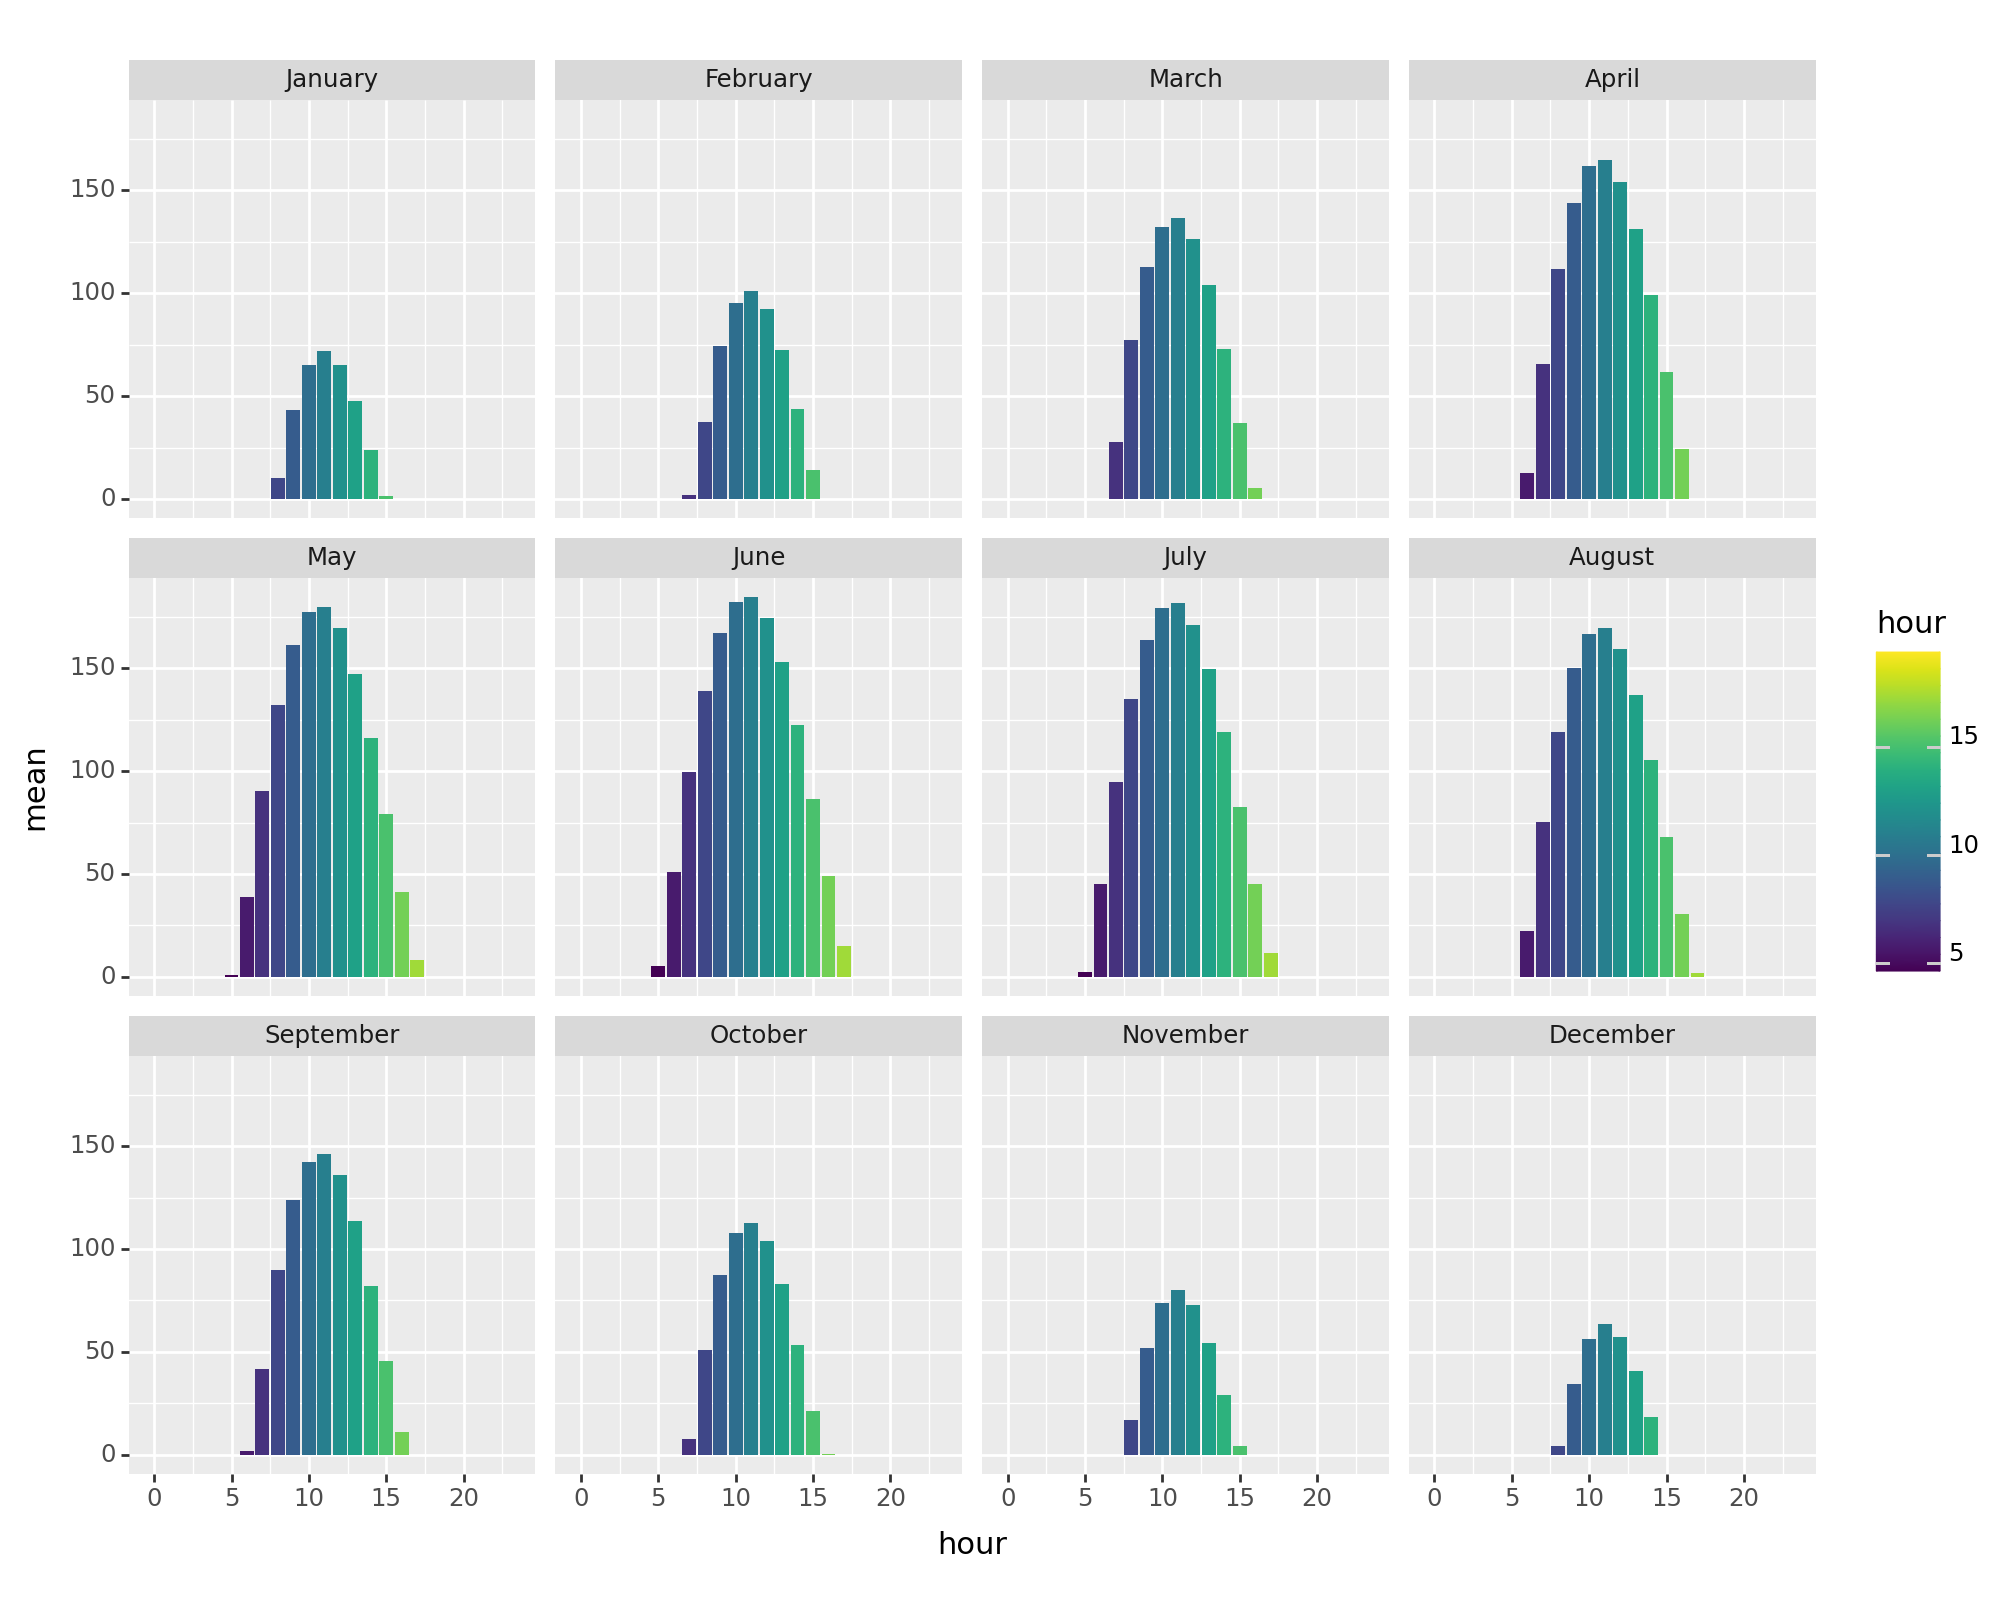

<Figure Size: (1000 x 800)>

In [74]:
plot_hour_month(year_power)

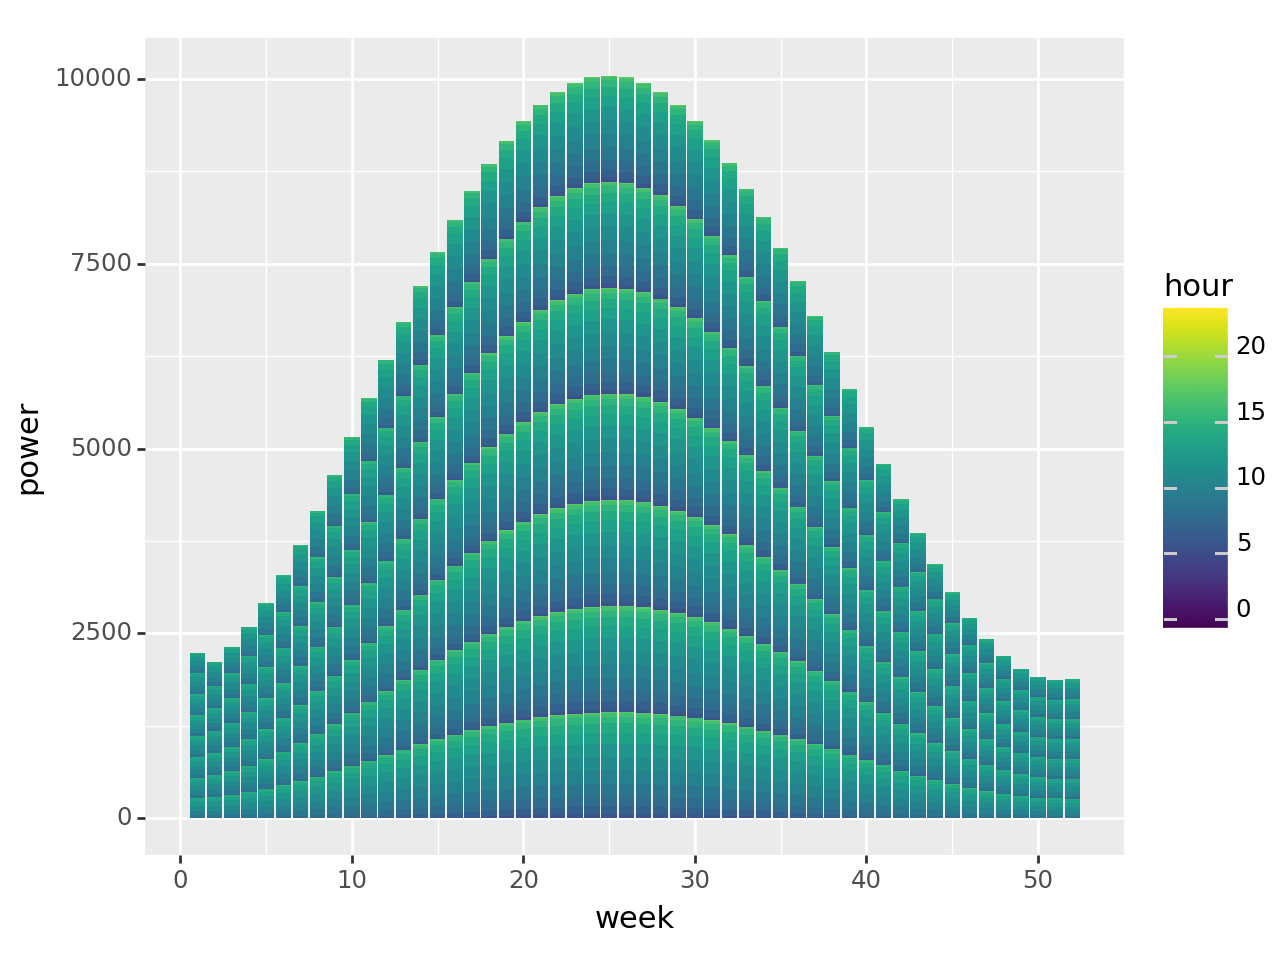

<Figure Size: (640 x 480)>

In [75]:
def plot_hour_year(year_power): return year_power >> ggplot(aes('week', 'power', fill='hour')) + geom_col()
plot_hour_year(year_power)

In [76]:
from ipywidgets import interact

In [78]:
@interact(horizontal_angle=(0, 360, 10), vertical_angle=(0, 90, 10), plot = {
    'plot_hour_month': plot_hour_month, 'plot_hour_year': plot_hour_year,
      'plot_power_month': plot_power_month, 'plot_yday': plot_yday, 'plot_avg_hour': plot_avg_hour})
def plot_power_hour(horizontal_angle, vertical_angle, plot):
    year_power = calc_year_power(panel, horizontal_angle, vertical_angle)
    return plot(year_power)

interactive(children=(IntSlider(value=180, description='horizontal_angle', max=360, step=10), IntSlider(value=…

In [ ]:
def calc_comb_angles(panel):
    params = [(h,v) for h in range(0, 360, 30) for v in range(0, 90, 15)]
    df = pd.DataFrame.from_records([{'power': calc_year_power(panel, h, v).select(c.power.sum()).item(), 'h_angle': h, 'v_angle': v} for h,v in tqdm(params)])
    return df

In [ ]:
comb_angles = calc_comb_angles(panel)

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

  0%|          | 0/8760 [00:00<?, ?it/s]

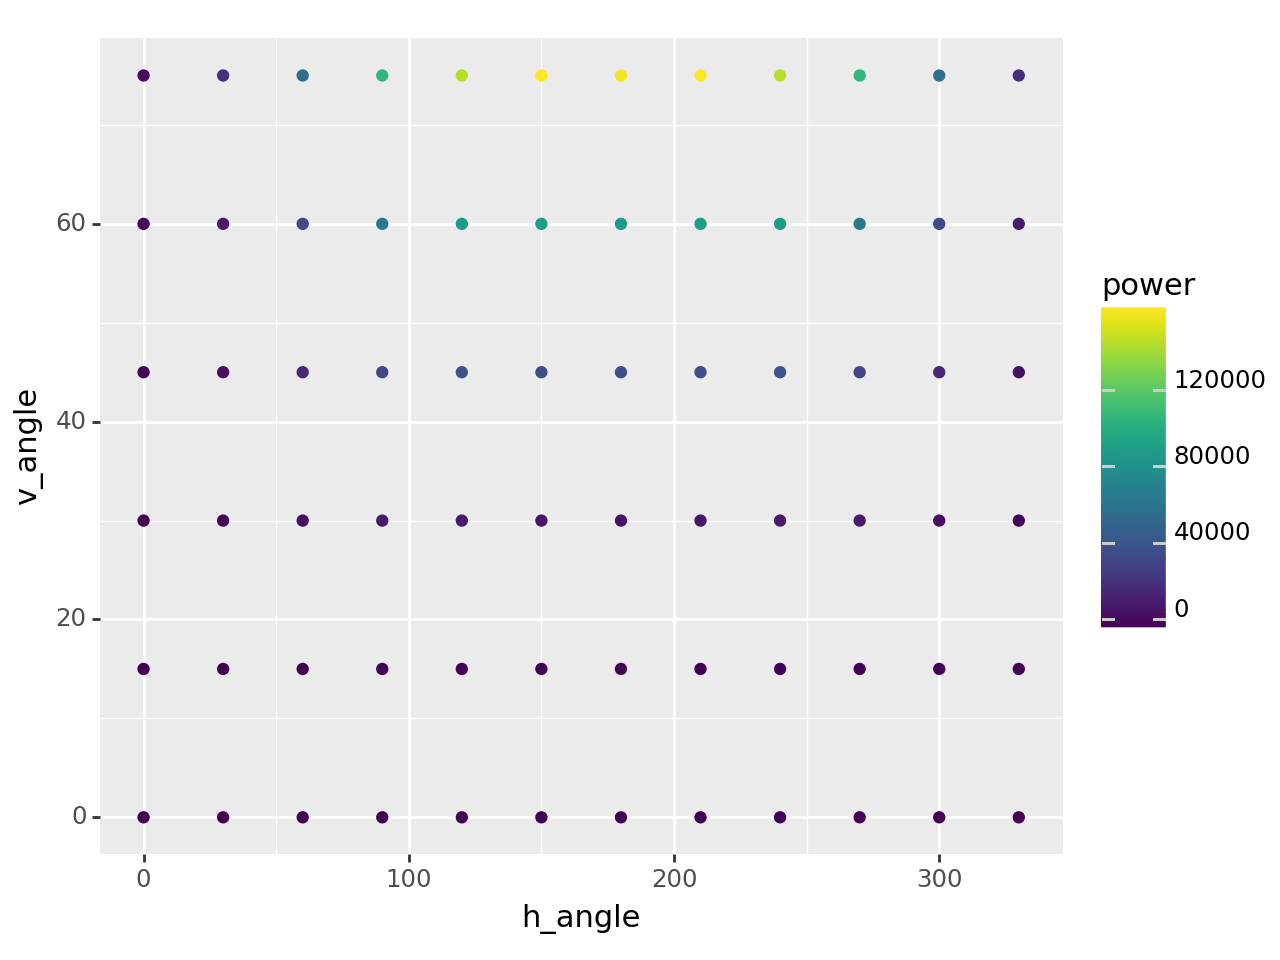

<Figure Size: (640 x 480)>

In [ ]:
ggplot(comb_angles) + geom_point(aes('h_angle', 'v_angle', fill='power', color='power'))# + scale_fill_gradient(low="white", high="red")